In [33]:
import pandas as pd

In [35]:
df = pd.read_csv('WineQT_regression.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [8]:
# Identify missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [37]:
# Drop the column "Id", as it is not related to analysis
df.drop(columns=['Id'], inplace=True)

In [10]:
# Identify outliers, using Z-score

In [8]:
from scipy.stats import zscore

In [39]:
# Calculate Z-scores for the dataset
z_scores = df.apply(zscore)

In [41]:
# Identify outliers using a threshold of Z-score > 3 or < -3
outliers = (z_scores.abs() > 3).any(axis=1)

In [43]:
# Remove the identified outliers
data_no_outliers = df[~outliers]

# Display the first few rows of the dataset without outliers
print(data_no_outliers.head())
print(data_no_outliers.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [45]:
# Redefine the dataframe without outliers
df = data_no_outliers

In [ ]:
# Identify the correlations

In [96]:
# Summary statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000
mean,8.285879,0.528132,0.260298,2.392651,0.081318,14.914505,43.267051,0.996693,3.316513,0.640768,10.435142,5.674352
std,1.649721,0.170495,0.191656,0.870089,0.020785,9.232228,29.039955,0.001735,0.143251,0.127751,1.028969,0.784835
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991570,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.395000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.240000,2.200000,0.079000,13.000000,35.000000,0.996600,3.320000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.410000,2.600000,0.088000,20.000000,58.000000,0.997800,3.400000,0.710000,11.100000,6.000000
max,13.500000,1.070000,0.790000,6.550000,0.226000,46.000000,144.000000,1.002200,3.780000,1.130000,13.600000,8.000000


In [40]:
# Make a correlation matrix
correlation_matrix = df.corr()

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

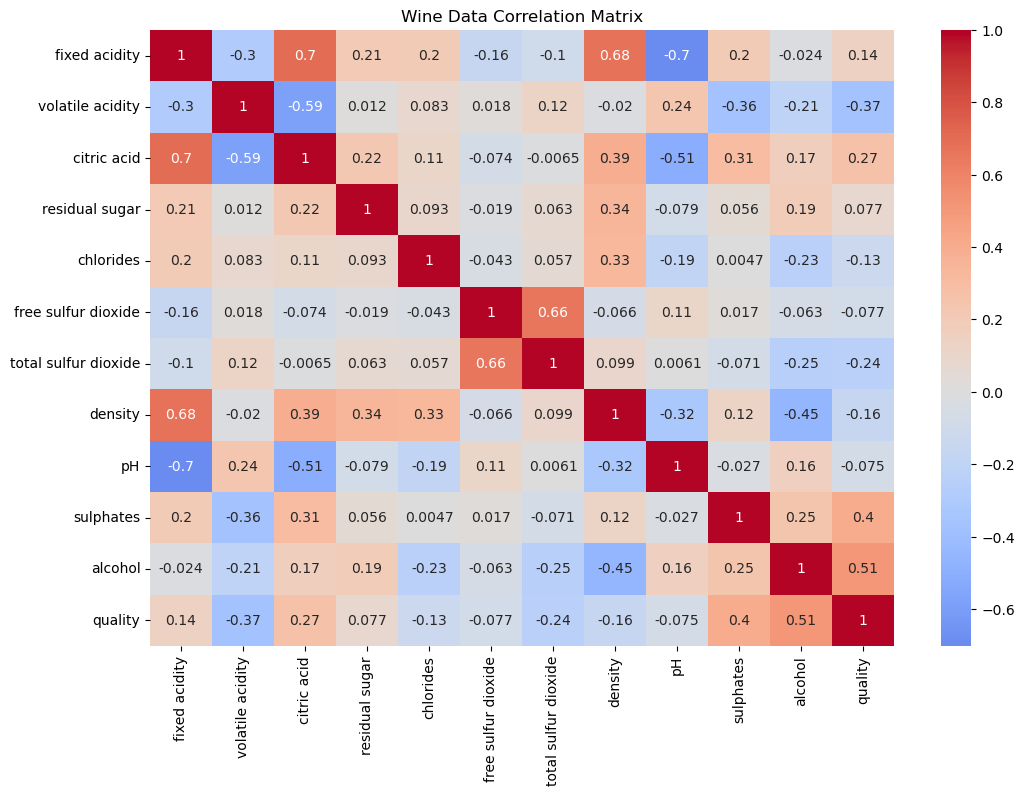

In [42]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Wine Data Correlation Matrix')
plt.show()

In [ ]:
# The heatmap indicates the strength and direction of relationships between pairs of variables. Notable points include:
#A strong positive correlation between "quality" and "alcohol" (0.51).
#Negative correlations between "quality" and "volatile acidity" (-0.37), and "density" (-0.16).

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

In [38]:
# Calculate the VIF for each feature
X = df.drop(columns=['quality'])  
X['intercept'] = 1  

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF data
vif_data

,feature,VIF
0,fixed acidity,8.300106e+00
1,volatile acidity,1.859005e+00
2,citric acid,3.187595e+00
3,residual sugar,1.684764e+00
4,chlorides,1.169034e+00
5,free sulfur dioxide,1.884438e+00
6,total sulfur dioxide,2.103653e+00
7,density,6.610531e+00
8,pH,3.304776e+00
9,sulphates,1.311780e+00


[]

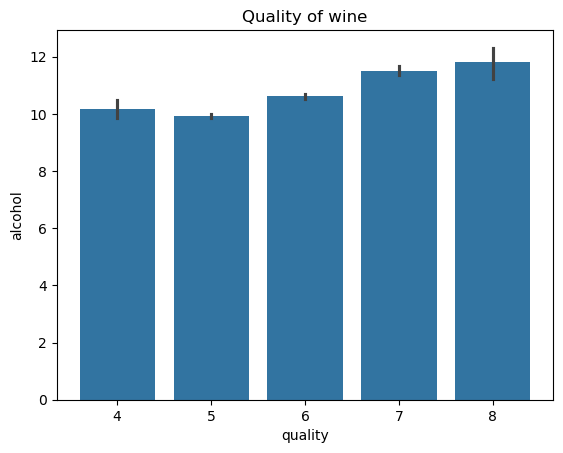

In [106]:
# Explore the distribution of "quality"
sns.barplot(df,x='quality',y='alcohol')
plt.title('Quality of wine')
plt.plot()

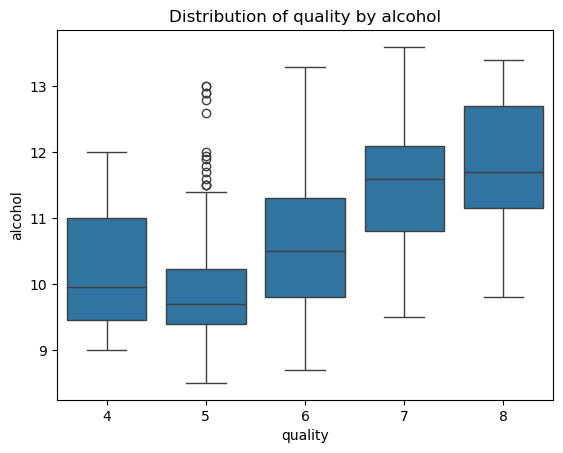

In [114]:
sns.boxplot(df,x='quality',y='alcohol')
plt.title('Distribution of quality by alcohol')
plt.show()

In [ ]:
## High VIF Values: For "Fixed Acidity" and "Density," consider further investigation. If these variables are essential, consider techniques like principal component analysis (PCA) to reduce multicollinearity.
## Moderate VIF Values: "Volatile Acidity," "Citric Acid," "pH," and "Alcohol" have moderate multicollinearity, which is usually acceptable but should be monitored.

In [47]:
# Exclude "Fixed Acidity" and "Density" to define a new dataframe for model building
df_model = df.drop(columns=['fixed acidity', 'density'])

In [49]:
# Separate the features (X) and target variable (y)
X = df_model.drop(columns=['quality'])
y = df_model['quality']

In [51]:
from sklearn.preprocessing import StandardScaler

In [53]:
# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split

In [55]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [57]:
# Display the dimensions of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training set shape: (832, 9)
Testing set shape: (209, 9)
Training labels shape: (832,)
Testing labels shape: (209,)


In [ ]:
# Dataset Information:
#Training Set: 914 samples, 10 features
#Testing Set: 229 samples, 10 features

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

In [65]:
# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

In [67]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.2967296650717704, 0.4826595154466352)

In [75]:
from sklearn.model_selection import GridSearchCV

In [106]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],  
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [108]:
# Initialise GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

In [110]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [112]:
# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [114]:
# Train the model with the best parameters
best_rf = grid_search.best_estimator_

In [116]:
# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.27426076555023926


In [118]:
r2_test = r2_score(y_test, y_pred)

In [120]:
print(f"R-squre: {r2_test}")

R-squre: 0.5218334597269897


In [ ]:
## K-Fold

In [176]:
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [166]:
from sklearn.model_selection import cross_val_score, KFold

In [192]:
# Define the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [194]:
# Define a custom scoring function for MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [196]:
# Perform 5-fold cross-validation
cv_mse_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring=mse_scorer, n_jobs=-1)
cv_r2_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='r2', n_jobs=-1)

In [198]:
# Convert the MSE scores back to positive for interpretation
cv_mse_scores = -cv_mse_scores

In [200]:
# Print the Mean Squared Error for each fold
print("Cross-validated Mean Squared Errors (MSE):", cv_mse_scores)
print("Average MSE:", cv_mse_scores.mean())

Cross-validated Mean Squared Errors (MSE): [0.49950119 0.24520119 0.33225542 0.36732771 0.52844699 0.30897108
 0.28220602 0.36279277 0.31469639 0.26883012]
Average MSE: 0.35102288869764775


In [202]:
# Print the R^2 score for each fold
print("Cross-validated R^2 scores:", cv_r2_scores)
print("Average R^2:", cv_r2_scores.mean())

Cross-validated R^2 scores: [0.41521812 0.60052191 0.4944992  0.39835459 0.25855982 0.44075097
 0.52697876 0.38106008 0.36535615 0.47357285]
Average R^2: 0.4354872452551721


In [206]:
# Continue with grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [208]:
# Initialise GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Train the model with the best parameters
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Calculate the Mean Squared Error and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Mean Squared Error: 0.27938914666426085
R^2 Score: 0.5128922601005197


In [ ]:
## SVR

In [132]:
from sklearn.svm import SVR

In [140]:
from sklearn.metrics import mean_absolute_error

In [134]:
# Train the Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [136]:
# Make predictions on the test set
svr_predictions = svr_model.predict(X_test)

In [146]:
# Evaluate the model
svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

In [148]:
print(f"SVR MAE: {svr_mae}")
print(f"SVR MSE: {svr_mse}")
print(f"SVR R-square: {svr_r2}")

SVR MAE: 0.424310555983582
SVR MSE: 0.3386835962864253
SVR R-square: 0.40951392315050117


In [ ]:
# Hyperparameter tuning on the SVR

In [150]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [152]:
# Create a GridSearchCV 
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

In [154]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2')

In [156]:
# Get the best parameters and best score
best_params_svr = grid_search.best_params_
best_score_svr = grid_search.best_score_

In [158]:
print("Best Parameters of SVR:", best_params_svr)
print("Best Score of SVR:", best_score_svr)

Best Parameters of SVR: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Best Score of SVR: 0.3844156031650227


In [160]:
# Train the model with the best parameters
best_svr = grid_search.best_estimator_

In [164]:
# Make predictions on the test set
y_pred = best_svr.predict(X_test)

# Calculate the Mean Squared Error
mse_svr = mean_squared_error(y_test, y_pred)
r2_svr_tes = r2_score(y_test, y_pred)
print(f"Mean Squared Error of SVR: {mse_svr}")
print(f"R-square of SVR: {mse_svr}")

Mean Squared Error of SVR: 0.3386835962864253
R-square of SVR: 0.3386835962864253
